In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
N = 10**6

In [26]:
ip = np.random.randn(N) > 0.5 
ip = np.array(ip) 

In [27]:
s = 2 * ip - 1        

s = np.array(s) 


In [28]:
eb_no_db = np.arange(0,30) 

In [29]:
bit_error_rate_zero = np.zeros(len(eb_no_db)) 
bit_error_rate_MMSE = np.zeros(len(eb_no_db)) 

In [30]:
def Zero_Forcing(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the Zero Forcing equalization matrix W = inv(H^H*H)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.matmul(H_Hermitian,H) 
            
            rank = np.linalg.matrix_rank(H_Hermitian_H)
            
            invertible = True if np.all(np.isfinite(np.linalg.inv(H_Hermitian_H))) else False

            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_zero[jj] = nErr / N 
        
        
        
        

    return  bit_error_rate_zero



#     cnt=0
#     for x in range(0,len(result),2):        
#             if result[x] == ip[x] and result[x+1] == ip[x+1]:
#                 continue
#             cnt+=1
            
#     print("total error:",cnt)
    
    

In [31]:
def MMSE(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the MMSE equalization matrix W = inv(H^H*H+(1/snr)I)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.matmul(H_Hermitian,H)
            
            identity_matrix = np.eye(2)
            
            snr_inverse = (1 / (10 ** (-eb_no_db[jj] / 10)))
            
            H_Hermitian_H = H_Hermitian_H + snr_inverse * identity_matrix
                               

            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            received_bits_list.append(m) 
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_MMSE[jj] = nErr / N 
        
        
        
        

    return bit_error_rate_MMSE

[0.282878 0.250003 0.217844 0.185723 0.155467 0.128293 0.104721 0.085021
 0.068893 0.055147 0.044384 0.035557 0.028511 0.022458 0.018181 0.014253
 0.011249 0.008949 0.007163 0.005848 0.004617 0.003651 0.002889 0.002183
 0.001856 0.00144  0.001173 0.000855 0.000699 0.000538]
[0.250546 0.224295 0.207796 0.196347 0.188049 0.180321 0.173242 0.166183
 0.159279 0.152217 0.146431 0.140616 0.136131 0.132038 0.128347 0.125378
 0.123228 0.121197 0.119927 0.118562 0.117478 0.116311 0.116308 0.115206
 0.115045 0.114871 0.114302 0.114089 0.11359  0.113248]


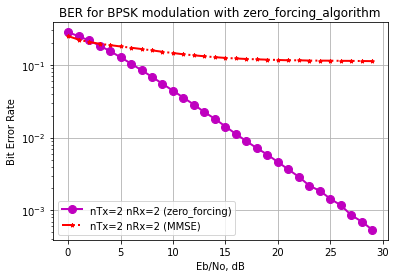

In [32]:
result_zero = Zero_Forcing()
result_MMSE = MMSE()
print(result_zero)
print(result_MMSE)

plt.figure()
plt.semilogy(eb_no_db, result_zero, 'mo-', linewidth=2, markersize=8, label='nTx=2 nRx=2 (zero_forcing)')
plt.semilogy(eb_no_db, result_MMSE, 'r*-.', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE)')
# plt.axis([0, 30, 1e-5, 0.1])
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with zero_forcing_algorithm')
plt.show()